# 🍛 Food Delivery Analysis

### Author: Aston Crawley

In [1]:
# ============== 1. Setup ==============
# Import libraries
import os
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# ============== 2. Data Loading ==============
# Load data from SQLite database
con = sqlite3.connect(os.path.join("..", "data", "zomato_rawdata.sqlite"))
df = pd.read_sql_query("SELECT * FROM Users", con)
df.shape

(51717, 18)

In [3]:
# Preview data
df.head()

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [5]:
# ============== 3. Data Cleaning ==============
# Check for missing values
df.isnull().sum()

index                              0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [6]:
# Show proportion of missing values
df.isnull().sum()/df.shape[0]*100

index                           0.000000
url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [7]:
# Check unique values in 'rate' column
df["rate"].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [8]:
# Replace 'NEW' and '-' with NaN
df["rate"].replace(["NEW", "-"], np.nan, inplace=True)

/var/folders/kh/hv0681hd5n1bnsmh2y16qm3h0000gn/T/ipykernel_95365/564228890.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rate"].replace(["NEW", "-"], np.nan, inplace=True)


In [9]:
# Normalise 'rate' column
df["rate"] = df["rate"].apply(lambda x: float(x.split("/")[0]) if type(x)==str else x)

In [10]:
# Check updated unique values in 'rate' column
df["rate"].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [11]:
# Create pivot table of 'rate' vs 'online_order'
x = pd.crosstab(df["rate"], df["online_order"])
x

online_order,No,Yes
rate,,
1.8,5,0
2.0,11,0
2.1,9,15
2.2,10,16
2.3,29,22
2.4,36,34
2.5,38,63
2.6,83,177
2.7,141,166


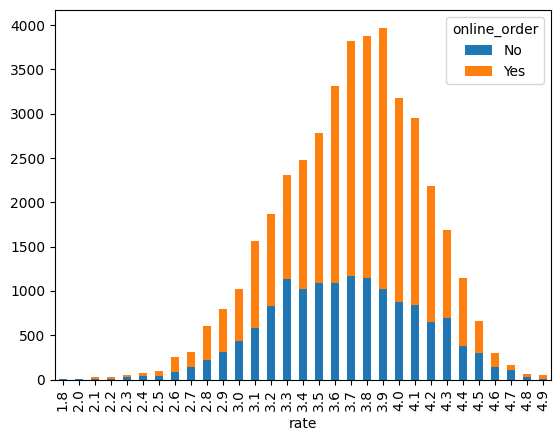

In [12]:
# Plot stacked bar chart
x.plot(kind="bar", stacked=True)
plt.show()

In [13]:
x.sum(axis=1)

rate
1.8       5
2.0      11
2.1      24
2.2      26
2.3      51
2.4      70
2.5     101
2.6     260
2.7     307
2.8     600
2.9     802
3.0    1023
3.1    1561
3.2    1873
3.3    2310
3.4    2476
3.5    2784
3.6    3316
3.7    3821
3.8    3873
3.9    3972
4.0    3183
4.1    2948
4.2    2184
4.3    1693
4.4    1147
4.5     656
4.6     300
4.7     167
4.8      66
4.9      55
dtype: int64

In [14]:
# Normalise the pivot table to show proportions
normalised_df = x.div(x.sum(axis=1), axis=0)*100
normalised_df

online_order,No,Yes
rate,,
1.8,100.000000,0.000000
2.0,100.000000,0.000000
2.1,37.500000,62.500000
2.2,38.461538,61.538462
2.3,56.862745,43.137255
2.4,51.428571,48.571429
2.5,37.623762,62.376238
2.6,31.923077,68.076923
2.7,45.928339,54.071661


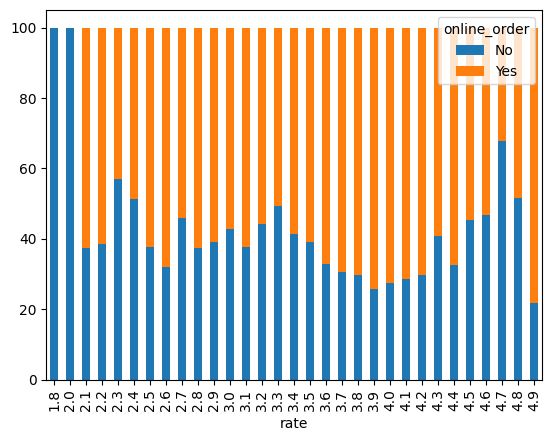

In [15]:
# Plot normalised stacked bar chart
normalised_df.plot(kind="bar", stacked=True)
plt.show()

In [16]:
# Check null values in 'rest_type' column
df["rest_type"].isnull().sum()

np.int64(227)

In [17]:
# Drop rows with null values in 'rest_type' column
data = df.dropna(subset=["rest_type"])

In [18]:
# Confirm null values are dropped
data["rest_type"].isnull().sum()

np.int64(0)

In [19]:
# Preview unique values in 'rest_type' column
data["rest_type"].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', 'Dhaba', 'Quick Bites, Sweet Shop',
       'Microbrewery', 'Food Court, Quick Bites', 'Pub, Bar',
       'Casual Dining, Pub', 'Lounge, Ba

In [20]:
# Filter dataframe for 'Quick Bites' in 'rest_type'
quick_bites_df = data[data["rest_type"].str.contains("Quick Bites")]
quick_bites_df.shape

(20639, 18)

In [21]:
quick_bites_df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [22]:
# Preview 'reviews_list' column
quick_bites_df["reviews_list"]

3        [('Rated 4.0', "RATED\n  Great food and proper...
23       [('Rated 4.0', "RATED\n  So, went here with fr...
26       [('Rated 5.0', 'RATED\n  please provide some e...
31       [('Rated 1.0', "RATED\n  Worst restaurant ever...
34       [('Rated 3.0', 'RATED\n  Not worth for the mon...
                               ...                        
51641    [('Rated 2.0', "RATED\n  Food is not upto the ...
51642                                                   []
51643                                                   []
51644                                                   []
51645    [('Rated 5.0', "RATED\n  I was randomly lookin...
Name: reviews_list, Length: 20639, dtype: object

In [23]:
# Convert 'reviews_list' to lowercase for easier tokenisation
quick_bites_df["reviews_list"] = quick_bites_df["reviews_list"].apply(lambda x: x.lower())

/var/folders/kh/hv0681hd5n1bnsmh2y16qm3h0000gn/T/ipykernel_95365/2055066916.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quick_bites_df["reviews_list"] = quick_bites_df["reviews_list"].apply(lambda x: x.lower())


In [24]:
from nltk.corpus import RegexpTokenizer
tokenizer = RegexpTokenizer("[a-zA-Z]+")

In [25]:
tokenizer.tokenize(quick_bites_df["reviews_list"].values[0])

['rated',
 'rated',
 'n',
 'great',
 'food',
 'and',
 'proper',
 'karnataka',
 'style',
 'full',
 'meals',
 'been',
 'there',
 'twice',
 'and',
 'was',
 'fully',
 'satisfied',
 'will',
 'give',
 'stars',
 'if',
 'it',
 's',
 'well',
 'managed',
 'rated',
 'rated',
 'n',
 'reached',
 'the',
 'place',
 'at',
 'pm',
 'on',
 'saturday',
 'half',
 'of',
 'the',
 'items',
 'on',
 'the',
 'menu',
 'were',
 'over',
 'what',
 'was',
 'annoying',
 'was',
 'is',
 'the',
 'food',
 'was',
 'cold',
 'the',
 'taste',
 'was',
 'also',
 'very',
 'average',
 'only',
 'dosa',
 'and',
 'holige',
 'were',
 'good',
 'there',
 'were',
 'very',
 'few',
 'people',
 'in',
 'the',
 'restaurant',
 'and',
 'the',
 'service',
 'was',
 'still',
 'very',
 'slow',
 'the',
 'waiters',
 'were',
 'all',
 'standing',
 'in',
 'one',
 'corner',
 'and',
 'talking',
 'had',
 'to',
 'call',
 'them',
 'repeatedly',
 'rated',
 'rated',
 'n',
 'had',
 'been',
 'here',
 'good',
 'food',
 'served',
 'and',
 'tasty',
 'good',
 'plac

In [26]:
sample = data[0:10000]
reviews_tokens = sample["reviews_list"].apply(tokenizer.tokenize)
reviews_tokens

0        [Rated, RATED, n, A, beautiful, place, to, din...
1        [Rated, RATED, n, Had, been, here, for, dinner...
2        [Rated, RATED, n, Ambience, is, not, that, goo...
3        [Rated, RATED, n, Great, food, and, proper, Ka...
4        [Rated, RATED, n, Very, good, restaurant, in, ...
                               ...                        
10046    [Rated, RATED, n, A, simplistic, joy, for, loc...
10047                              [Rated, RATED, n, Good]
10048    [Rated, RATED, n, Vry, gud, taste, and, someth...
10049                                                   []
10050                                                   []
Name: reviews_list, Length: 10000, dtype: object

In [27]:
import ssl
import nltk

# Bypass SSL certificate verification
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

# Download stopwords
nltk.download("stopwords")


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/astoncrawley/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/astoncrawley/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
from nltk.corpus import stopwords

stop_words = stopwords.words("english")
stop_words

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [30]:
stop_words.extend(["rated", "n", "nan", "x", "Rated", "RATED"])
stop_words

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [31]:
reviews_tokens_clean = reviews_tokens.apply(lambda x: [token for token in x if token not in stop_words])
reviews_tokens_clean

0        [A, beautiful, place, dine, The, interiors, ta...
1        [Had, dinner, family, Turned, good, choose, su...
2        [Ambience, good, enough, pocket, friendly, caf...
3        [Great, food, proper, Karnataka, style, full, ...
4        [Very, good, restaurant, neighbourhood, Buffet...
                               ...                        
10046    [A, simplistic, joy, local, biryani, lovers, n...
10047                                               [Good]
10048    [Vry, gud, taste, something, different, must, ...
10049                                                   []
10050                                                   []
Name: reviews_list, Length: 10000, dtype: object

In [32]:
total_reviews_2D = list(reviews_tokens_clean)

total_reviews_1D = []

for review in total_reviews_2D:
    for word in review:
        total_reviews_1D.append(word)

total_reviews_1D

['A',
 'beautiful',
 'place',
 'dine',
 'The',
 'interiors',
 'take',
 'back',
 'Mughal',
 'era',
 'The',
 'lightings',
 'perfect',
 'We',
 'went',
 'occasion',
 'Christmas',
 'limited',
 'items',
 'available',
 'But',
 'taste',
 'service',
 'compromised',
 'The',
 'complaint',
 'breads',
 'could',
 'better',
 'Would',
 'surely',
 'like',
 'come',
 'I',
 'dinner',
 'family',
 'weekday',
 'The',
 'restaurant',
 'completely',
 'empty',
 'Ambience',
 'good',
 'good',
 'old',
 'hindi',
 'music',
 'Seating',
 'arrangement',
 'good',
 'We',
 'ordered',
 'masala',
 'papad',
 'panner',
 'baby',
 'corn',
 'starters',
 'lemon',
 'corrionder',
 'soup',
 'butter',
 'roti',
 'olive',
 'chilli',
 'paratha',
 'Food',
 'fresh',
 'good',
 'service',
 'good',
 'Good',
 'family',
 'hangout',
 'nCheers',
 'Its',
 'restaurant',
 'near',
 'Banashankari',
 'BDA',
 'Me',
 'along',
 'office',
 'friends',
 'visited',
 'buffet',
 'unfortunately',
 'provide',
 'veg',
 'buffet',
 'On',
 'inquiring',
 'said',
 'pla

In [33]:
from nltk import FreqDist, bigrams, trigrams

fdist = FreqDist(total_reviews_1D)
fdist.most_common(20)

[('place', 139173),
 ('I', 137965),
 ('good', 134232),
 ('food', 126195),
 ('The', 97479),
 ('chicken', 46887),
 ('service', 41216),
 ('taste', 40063),
 ('ordered', 39651),
 ('great', 34402),
 ('really', 33942),
 ('time', 33052),
 ('try', 32415),
 ('one', 32079),
 ('ambience', 31703),
 ('like', 30679),
 ('also', 30647),
 ('It', 30487),
 ('visit', 27355),
 ('restaurant', 26421)]

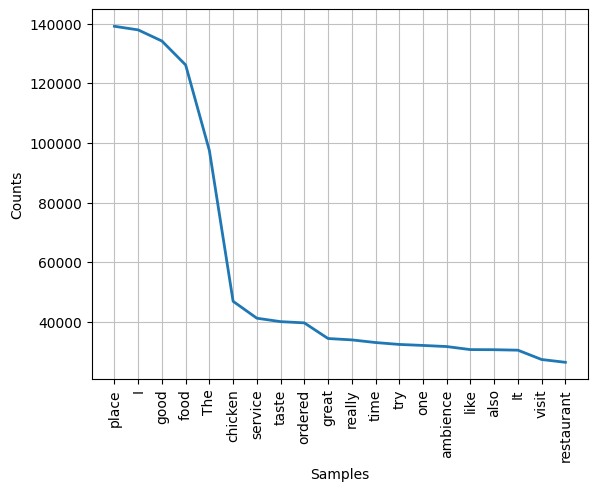

In [34]:
fdist.plot(20)
plt.show()

In [35]:
bi_grams = bigrams(total_reviews_1D)
fdist_bi = FreqDist(bi_grams)
fdist_bi.most_common(20)

[(('The', 'food'), 10497),
 (('I', 'ordered'), 10159),
 (('really', 'good'), 9575),
 (('This', 'place'), 8208),
 (('must', 'try'), 7824),
 (('I', 'would'), 7353),
 (('We', 'ordered'), 7223),
 (('visit', 'place'), 6897),
 (('food', 'good'), 6823),
 (('good', 'food'), 6482),
 (('The', 'place'), 6158),
 (('main', 'course'), 5544),
 (('non', 'veg'), 5364),
 (('good', 'place'), 5339),
 (('ice', 'cream'), 5287),
 (('also', 'good'), 5083),
 (('The', 'ambience'), 4798),
 (('I', 'tried'), 4523),
 (('good', 'I'), 4139),
 (('good', 'The'), 4078)]

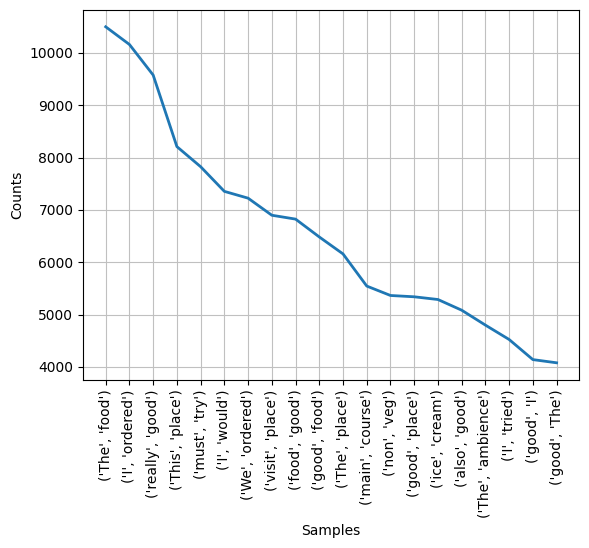

In [36]:
fdist_bi.plot(20)
plt.show()

In [37]:
tri_grams = trigrams(total_reviews_1D)
fdist_tri = FreqDist(tri_grams)
fdist_tri.most_common(20)

[(('veg', 'non', 'veg'), 1525),
 (('must', 'visit', 'place'), 1487),
 (('The', 'food', 'good'), 1339),
 (('place', 'hangout', 'friends'), 1165),
 (('I', 'must', 'say'), 1131),
 (('I', 'would', 'recommend'), 1059),
 (('I', 'visited', 'place'), 1054),
 (('I', 'would', 'say'), 979),
 (('place', 'hang', 'friends'), 967),
 (('food', 'really', 'good'), 886),
 (('nFood', 'nAmbience', 'nService'), 845),
 (('A', 'must', 'visit'), 768),
 (('The', 'ambience', 'good'), 751),
 (('A', 'good', 'place'), 737),
 (('North', 'Indian', 'food'), 675),
 (('I', 'would', 'like'), 619),
 (('nFood', 'nService', 'nAmbience'), 607),
 (('A', 'must', 'try'), 603),
 (('I', 'really', 'liked'), 595),
 (('I', 'ordered', 'chicken'), 582)]

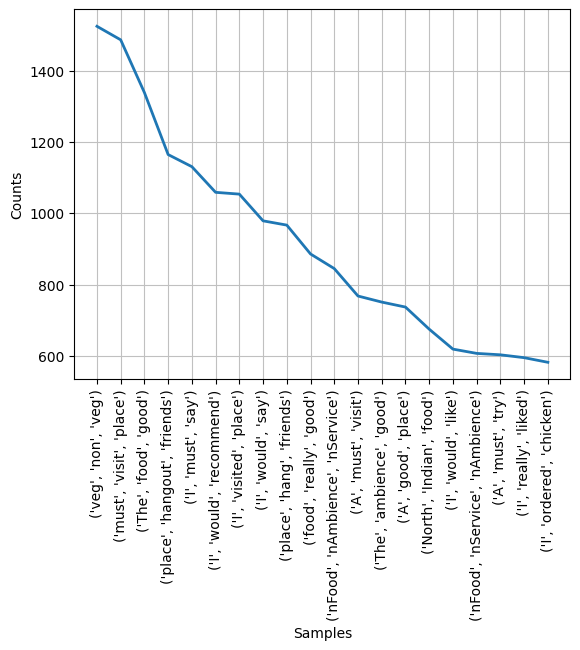

In [38]:
fdist_tri.plot(20)
plt.show()

In [39]:
df["location"].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', None, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan

In [40]:
len(df["location"].unique())

94

In [41]:
df["location"] = df["location"] + ", Bangalore, Karnataka, India"
df_copy = df.copy()

In [42]:
# df_copy["location"] = df_copy["location"] + ", Bangalore, Karnataka, India"
df_copy["location"].unique()

array(['Banashankari, Bangalore, Karnataka, India',
       'Basavanagudi, Bangalore, Karnataka, India',
       'Mysore Road, Bangalore, Karnataka, India',
       'Jayanagar, Bangalore, Karnataka, India',
       'Kumaraswamy Layout, Bangalore, Karnataka, India',
       'Rajarajeshwari Nagar, Bangalore, Karnataka, India',
       'Vijay Nagar, Bangalore, Karnataka, India',
       'Uttarahalli, Bangalore, Karnataka, India',
       'JP Nagar, Bangalore, Karnataka, India',
       'South Bangalore, Bangalore, Karnataka, India',
       'City Market, Bangalore, Karnataka, India',
       'Nagarbhavi, Bangalore, Karnataka, India',
       'Bannerghatta Road, Bangalore, Karnataka, India',
       'BTM, Bangalore, Karnataka, India',
       'Kanakapura Road, Bangalore, Karnataka, India',
       'Bommanahalli, Bangalore, Karnataka, India', nan,
       'CV Raman Nagar, Bangalore, Karnataka, India',
       'Electronic City, Bangalore, Karnataka, India',
       'HSR, Bangalore, Karnataka, India',
       '

In [43]:
df_copy["location"].isnull().sum()

np.int64(21)

In [44]:
df_copy.dropna(subset=["location"], inplace=True)
df_copy["location"].isnull().sum()

np.int64(0)

In [45]:
locations = pd.DataFrame(df_copy["location"].unique())
locations.columns = ["name"]
locations

,name
0,"Banashankari, Bangalore, Karnataka, India"
1,"Basavanagudi, Bangalore, Karnataka, India"
2,"Mysore Road, Bangalore, Karnataka, India"
3,"Jayanagar, Bangalore, Karnataka, India"
4,"Kumaraswamy Layout, Bangalore, Karnataka, India"
...,...
88,"West Bangalore, Bangalore, Karnataka, India"
89,"Magadi Road, Bangalore, Karnataka, India"
90,"Yelahanka, Bangalore, Karnataka, India"
91,"Sahakara Nagar, Bangalore, Karnataka, India"


In [46]:
import requests, certifi
from geopy.geocoders import Nominatim
from geopy.adapters import RequestsAdapter

# Custom adapter that forces certifi CA bundle
class CertifiAdapter(RequestsAdapter):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.session.verify = certifi.where()

# # Pass the custom adapter into Nominatim
# geolocator = Nominatim(
#     user_agent="app",
#     adapter_factory=CertifiAdapter,
#     timeout=10
# )


geolocator = Nominatim(user_agent="food_delivery_app (your_email@example.com)", timeout=10)

In [47]:
# import ssl
# from geopy.geocoders import Nominatim

# ctx = ssl.create_default_context()
# ctx.check_hostname = False
# ctx.verify_mode = ssl.CERT_NONE

# geolocator = Nominatim(user_agent="app", ssl_context=ctx, timeout=None)

In [48]:
# from geopy.geocoders import Nominatim

# geolocator = Nominatim(user_agent="app", timeout=None)

In [50]:
import time

lat = []
lon = []

for location in locations["name"]:
    loc = geolocator.geocode(location)
    if loc:
        lat.append(loc.latitude)
        lon.append(loc.longitude)
    else:
        lat.append(np.nan)
        lon.append(np.nan)
    time.sleep(1)  # Respect Nominatim usage policy

In [51]:
locations["latitude"] = lat
locations["longitude"] = lon

locations

,name,latitude,longitude
0,"Banashankari, Bangalore, Karnataka, India",12.927820,77.556621
1,"Basavanagudi, Bangalore, Karnataka, India",12.941726,77.575502
2,"Mysore Road, Bangalore, Karnataka, India",12.946703,77.530070
3,"Jayanagar, Bangalore, Karnataka, India",12.929273,77.582423
4,"Kumaraswamy Layout, Bangalore, Karnataka, India",12.906768,77.559502
...,...,...,...
88,"West Bangalore, Bangalore, Karnataka, India",13.022235,77.567183
89,"Magadi Road, Bangalore, Karnataka, India",12.975608,77.555356
90,"Yelahanka, Bangalore, Karnataka, India",13.100698,77.596345
91,"Sahakara Nagar, Bangalore, Karnataka, India",13.062147,77.580061


In [52]:
locations.isnull().sum()

name         0
latitude     3
longitude    3
dtype: int64

In [53]:
locations[locations["latitude"].isna()]

,name,latitude,longitude
64,"ITPL Main Road, Whitefield, Bangalore, Karnata...",NaN,NaN
79,"Rammurthy Nagar, Bangalore, Karnataka, India",NaN,NaN
85,"Sadashiv Nagar, Bangalore, Karnataka, India",NaN,NaN


In [54]:
# Manually adding missing coordinates
locations["latitude"][64] = 12.9804194
locations["longitude"][64] = 77.7275164

locations["latitude"][79] = 13.0120218
locations["longitude"][79] = 77.6777817

locations["latitude"][85] = 13.010316
locations["longitude"][85] = 77.580569

/var/folders/kh/hv0681hd5n1bnsmh2y16qm3h0000gn/T/ipykernel_95365/2909684203.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  locations["latitude"][64] = 12.9804194
/var/folders/kh/hv0681hd5n1bnsmh2y16qm3h0000gn/T/ipykernel_95365/290968420

In [55]:
locations[locations["latitude"].isna()]

,name,latitude,longitude


In [56]:
df['cuisines'].isnull().sum()

np.int64(45)

In [57]:
df.dropna(subset=['cuisines'], inplace=True)

north_india_df = df[df["cuisines"].str.contains("North Indian")]
north_india_df

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,"Banashankari, Bangalore, Karnataka, India",Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,"Banashankari, Bangalore, Karnataka, India",Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,"Banashankari, Bangalore, Karnataka, India",Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,"Basavanagudi, Bangalore, Karnataka, India",Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,5,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8,286,+91 9980040002\r\n+91 9980063005,"Basavanagudi, Bangalore, Karnataka, India",Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51706,51706,https://www.zomato.com/bangalore/red-glow-whit...,"Poornima Complex, Dodsworth Layout, Whitefield...",Red Glow,No,No,3.7,27,+91 9740571131,"Whitefield, Bangalore, Karnataka, India",Pub,None,"North Indian, Continental","1,200","[('Rated 5.0', 'RATED\n Excellent place had n...",[],Pubs and bars,Whitefield
51708,51708,https://www.zomato.com/bangalore/keys-cafe-key...,"Keys Hotel, 6, 1st Phase Industrial Area, Near...",Keys Cafe - Keys Hotel,No,No,2.8,161,080 39451000\n+91 8884038484,"Whitefield, Bangalore, Karnataka, India","Casual Dining, Bar","Salads, Coffee, Breakfast Buffet, Halwa, Chick...","Chinese, Continental, North Indian","1,200","[('Rated 3.0', 'RATED\n Place is good not tha...",[],Pubs and bars,Whitefield
51709,51709,https://www.zomato.com/bangalore/the-farm-hous...,"136, SAP Labs India, KIADB Export Promotion In...",The Farm House Bar n Grill,No,No,3.7,34,+91 9980121279\n+91 9900240646,"Whitefield, Bangalore, Karnataka, India","Casual Dining, Bar",None,"North Indian, Continental",800,"[('Rated 4.0', 'RATED\n Ambience- Big and spa...",[],Pubs and bars,Whitefield
51711,51711,https://www.zomato.com/bangalore/bhagini-2-whi...,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,No,No,2.5,81,080 65951222,"Whitefield, Bangalore, Karnataka, India","Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars,Whitefield


In [58]:
north_india_restaurant_count = north_india_df['location'].value_counts().reset_index().rename(columns={'location':'name'})
north_india_restaurant_count

,name,count
0,"BTM, Bangalore, Karnataka, India",2469
1,"HSR, Bangalore, Karnataka, India",1123
2,"Whitefield, Bangalore, Karnataka, India",1059
3,"Marathahalli, Bangalore, Karnataka, India",1038
4,"JP Nagar, Bangalore, Karnataka, India",958
...,...,...
85,"Hebbal, Bangalore, Karnataka, India",4
86,"Jakkur, Bangalore, Karnataka, India",3
87,"Central Bangalore, Bangalore, Karnataka, India",2
88,"West Bangalore, Bangalore, Karnataka, India",1


In [59]:
locations

,name,latitude,longitude
0,"Banashankari, Bangalore, Karnataka, India",12.927820,77.556621
1,"Basavanagudi, Bangalore, Karnataka, India",12.941726,77.575502
2,"Mysore Road, Bangalore, Karnataka, India",12.946703,77.530070
3,"Jayanagar, Bangalore, Karnataka, India",12.929273,77.582423
4,"Kumaraswamy Layout, Bangalore, Karnataka, India",12.906768,77.559502
...,...,...,...
88,"West Bangalore, Bangalore, Karnataka, India",13.022235,77.567183
89,"Magadi Road, Bangalore, Karnataka, India",12.975608,77.555356
90,"Yelahanka, Bangalore, Karnataka, India",13.100698,77.596345
91,"Sahakara Nagar, Bangalore, Karnataka, India",13.062147,77.580061


In [60]:
heatmap_df = north_india_restaurant_count.merge(locations, on='name', how='left')
heatmap_df

,name,count,latitude,longitude
0,"BTM, Bangalore, Karnataka, India",2469,12.911276,77.604565
1,"HSR, Bangalore, Karnataka, India",1123,12.911623,77.638862
2,"Whitefield, Bangalore, Karnataka, India",1059,12.996400,77.761423
3,"Marathahalli, Bangalore, Karnataka, India",1038,12.955257,77.698416
4,"JP Nagar, Bangalore, Karnataka, India",958,12.909694,77.586607
...,...,...,...,...
85,"Hebbal, Bangalore, Karnataka, India",4,13.038218,77.591900
86,"Jakkur, Bangalore, Karnataka, India",3,13.078474,77.606894
87,"Central Bangalore, Bangalore, Karnataka, India",2,12.973009,77.580471
88,"West Bangalore, Bangalore, Karnataka, India",1,13.022235,77.567183


In [61]:
import folium

base_map = folium.Map()
base_map

In [62]:
from folium.plugins import HeatMap

# HeatMap(heatmap_df[["latitude", "longitude", "count"]], radius=15).add_to(base_map)
HeatMap(heatmap_df[["latitude", "longitude", "count"]]).add_to(base_map)
base_map

In [63]:
def get_heatmap(cusine):
    cusine_df = df[df["cuisines"].str.contains(cusine)]
    cusine_restaurant_count = cusine_df['location'].value_counts().reset_index().rename(columns={'location':'name'})
    heatmap_df = cusine_restaurant_count.merge(locations, on='name', how='left')
    base_map = folium.Map()
    HeatMap(heatmap_df[["latitude", "longitude", "count"]]).add_to(base_map)
    return base_map

In [64]:
get_heatmap("Chinese")

In [65]:
get_heatmap("Italian")